## Введение

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<font size = 3> <b> Описание данных: </b> </font>
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
#сохраним данные в датасет
df = pd.read_csv('/datasets/games.csv')

In [3]:
#посмотрим 10 разных строк датасета
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6663,Samurai Shodown II,NG,1994.0,Fighting,0.00,0.00,0.25,0.00,NaN,NaN,NaN
14985,Doki Oki,PS,1995.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16023,Elminage II DS Remix: Sousei no Megami to Unma...,DS,2010.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6463,Call of Duty: Black Ops 3,PC,2015.0,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,NaN
12351,F1 2001,XB,2001.0,Racing,0.05,0.01,0.00,0.00,83.0,5.5,E
4238,Hydro Thunder,PS,1999.0,Racing,0.26,0.17,0.00,0.03,NaN,NaN,NaN
13393,Turok: Dinosaur Hunter,N64,1997.0,Shooter,0.00,0.00,0.05,0.00,NaN,NaN,NaN
4816,Rocket Power: Dream Scheme,GBA,2001.0,Action,0.29,0.11,0.00,0.01,NaN,NaN,NaN
13570,Disney Planes Fire & Rescue,Wii,2014.0,Action,0.00,0.04,0.00,0.00,NaN,NaN,NaN
6242,Nichibutsu Arcade Classics,SNES,1995.0,Misc,0.00,0.00,0.28,0.00,NaN,NaN,NaN


In [4]:
#посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#и сразу проверим количество дубликатов
print('Количество дубликатов: ', df.duplicated().sum())

Количество дубликатов:  0


<font size = 3> <b> Вывод: </b> </font>
1. В датасете 16715 строк и 11 столбцов. Представлены данные за большой период: с 1980 года по 2016 год.
2. Нужно привести названия столбцов к нижнему регистру. Также сменим тип данных в столбце `Year_of_Release`с float на int, а в столбце `User_Score` с object на float.
3. Много пропусков содержится в 4 столбцах: `Year_of_Release`, `Critic_Score`, `User_Score` и `Rating`. Что делать с пропусками решим при предобработке.
4. Явных дубликатов нет.

## Подготовка данных

### Замена названий столбцов

Приведем названия столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5760,Vigilante 8,N64,1998.0,Racing,0.25,0.06,0.00,0.00,NaN,NaN,NaN
9104,Ford Racing Off Road,PSP,2008.0,Racing,0.05,0.08,0.00,0.02,47.0,tbd,E
12444,Akai Katana Shin,X360,2011.0,Shooter,0.04,0.00,0.01,0.00,NaN,NaN,NaN
9316,Monster Jam,DS,2007.0,Racing,0.12,0.00,0.00,0.01,NaN,tbd,E
6474,Star Trek: Invasion,PS,2000.0,Simulation,0.15,0.10,0.00,0.02,76.0,tbd,E


### Изменение типов данных

Изменим типы данных в столбце `year_of_release` c float на int, а в столбце `user_score` с object на float.

In [8]:
#укажем, что нужно игнорировать ошибки в строках с NaN
df['year_of_release'] = df['year_of_release'].astype('Int32', errors='ignore')
df['user_score'] = df['user_score'].astype('Float32', errors='ignore')

Проверим, что изменение типа данных прошло успешно.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int32
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


Как видим, тип данных в столбце `user_score` не изменился. Проверим, какие значения есть в этом столбце и что помешало сменить тип данных.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Смене типа данных мешает TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть рейтинг игры на момент выгрузки еще не был сформирован. Заменим tbd значениями NaN, чтобы они не мешали в последующих расчетах.

In [11]:
#заменим tbd значениями NaN,
df['user_score']= df['user_score'].replace('tbd', 'nan')

In [12]:
#и поменяем тип данных в столбце
df['user_score'] = df['user_score'].astype('Float32', errors='ignore')

### Замена пропусков

In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Как мы видим, в датасете есть следующие пропуски:
1. В столбцах `name` и `genre` по 2 пропуска.
2. В каждом из столбцов `critic_score`, `user_score` и `rating` более 6000 пропусков.
Посмотрим на пропуски в столбцах `name` и `genre`.

In [14]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, пропуски в столбцах `name` и `genre` содержатся в одних и тех же строчках каких-то игр 1993 г. и эти строчки можно удалить, т.к. заменить данные нам нечем и потеря двух строчек на исследовании никак не скажется.

In [15]:
df = df.dropna(subset = ['name'])

Посмотрим на пропуски в столбце `year_of_release`.

In [16]:
df['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000,  NaN, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int32

In [17]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Эти пропуски нам заменить нечем, поэтому тоже удалим данные строки. Удалится всего 1,5 % датасета, поэтому это тоже не окажет существенного влияния на результаты.

In [18]:
df = df.dropna(subset = ['year_of_release'])

Пропуски в столбцах `critic_score`, `user_score` и `rating` образовались, скорее всего, из-за того, что как мы видим в датасете находятся игры, выпущенные начиная с 1980 г., компания ESRB основана только в 1994 г., а агрегатор оценок Metacritic вообще в 2001 г. В связи с этим многие игры датасета не получили возрастной рейтинг и пользовательскую оценку, плюс в датасете есть малоизвестные игры, количество оценок у которых было настолько мало, что рейтинг не сформировался.

Эти данные нам заменить нечем, поэтому оставим пропуски, как есть.

Посмотрим, какие есть данные в столбцах c платформой, рейтингом и жанром игры.

In [19]:
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [20]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [21]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

<b>Рейтинги ESRB:</b>

`EC` — Early Childhood - «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.

`E` — Everyone - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.

`E10+` — Everyone 10+ (Первоначально "K-A") - «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

`T` — Teen - «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

`M` — Mature - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

`AO` — Adults Only - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

`RP` — Rating Pending - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Исходя из данных о рейтинге можно объединить `E10+` и `K-A`, т.к. это одна и та же категория.

In [22]:
df['rating']= df['rating'].replace('K-A', 'E10+')

In [23]:
df['rating'] = df['rating'].fillna('no_rating')

In [24]:
df['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1396
EC              8
RP              1
AO              1
Name: rating, dtype: int64

В других столбцах с данными всё хорошо, названия корректны.

### Суммарные продажи

Добавим в датасет столбец с суммарными продажами по всем регионам.

In [25]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7638,Wizards of Waverly Place: Spellbound,DS,2010,Misc,0.16,0.03,0.00,0.01,NaN,NaN,E,0.20
3538,Disney Universe,X360,2011,Action,0.37,0.14,0.00,0.05,66.0,5.3,E10+,0.56
8950,Jurassic: The Hunted,Wii,2009,Shooter,0.14,0.00,0.00,0.01,NaN,NaN,T,0.15
8153,Armored Core: Last Raven,PS2,2005,Simulation,0.05,0.04,0.08,0.01,59.0,8.9,T,0.18
11630,ZhuZhu Babies,DS,2011,Simulation,0.06,0.01,0.00,0.01,NaN,NaN,E,0.08
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
1137,Kinectimals,X360,2010,Simulation,1.02,0.46,0.00,0.13,74.0,3.1,E,1.61
14755,Yahari Game Demo Ore no Seishun Love-Kome wa M...,PSV,2016,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,no_rating,0.03
7240,NFL Quarterback Club 2002,PS2,2001,Sports,0.11,0.08,0.00,0.03,67.0,7.8,E,0.22
7392,Ninja Gaiden: Dragon Sword,DS,2008,Action,0.16,0.01,0.02,0.02,83.0,7.8,T,0.21


Столбец добавлен, всё посчиталось правильно, тип данных верный.

### Вывод по разделу

1. Названия столбцов были приведены к нижнему регистру.
2. Были изменены типы данных в столбце `year_of_release` c float на int, а в столбце `user_score` с object на float.
3. Данные со значениями tbd в столбце `user_score` были заменены значениями NaN, т.к. рейтинг у игры не сформирован и взять данные для замены негде.
4. Были удалены две строки с пропусками в столбцах `name` и `genre`.
5. Были удалены 269 строк с пропусками в столбце `year_of_release`, т.к. эти данные заменить нечем.
6. Пропуски в столбцах `critic_score`, `user_score` и `rating` оставили, как есть.
7. В датасет был добавлен столбец с суммарными продажи во всех регионах.

## Исследовательский анализ данных

<b>На этом шаге мы:</b>
- Посмотрим, сколько игр выпускалось в разные годы.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Решим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные годы

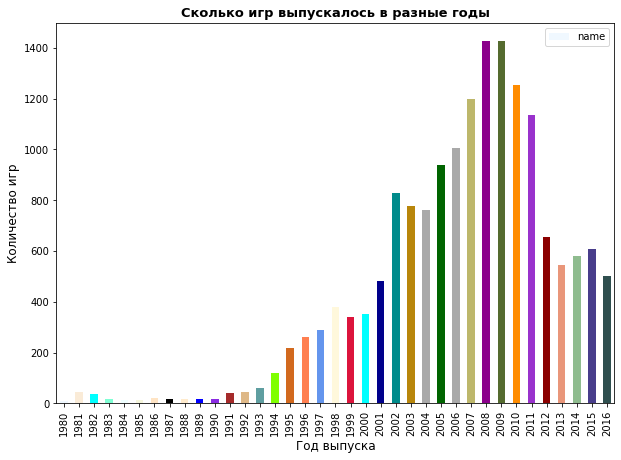

In [27]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(y='name', kind='bar', color = plt.cm.colors.cnames.keys(), figsize=(10,7))
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.title('Сколько игр выпускалось в разные годы', fontsize=13, fontweight='bold')
plt.show()

Как видим, до 1995 года игры были очень нишевым продуктом и выпускались в небольших количествах. С 1995 года пошел рост количества игровых релизов в год, что можно связать с выходом и популяризацией Playstation 1 в декабре 1994 года в Японии и в сентябре 1995 г. в Европе и Северной Америке. 

После этого наблюдается планомерный рост количества вышедших игр в год, пока в 2002 не произошел скачок количества релизов практически в 2 раза, что можно связать с набравшей популярность среди игроков и разработчиков игр вышедшей в конце 2000 г. Playstation 2.

Ну а пик количества релизов пришелся на 2008-2009 г., что опять можно связать с выходом нового поколения консолей Playstation 3 и Xbox 360 в 2006-2007 г.

После пика происходит достаточно резкое снижение количества выпущенных игр в 2012 г., что можно связать и с закатом поколения Playstation 3/Xbox 360 и с набирающим популярность сегментом мобильных игр, которые на сегодняшний день по оборотам обходят весь суммарный сегмент PC и консольных игр вместе взятых.

### Как менялись продажи по платформам

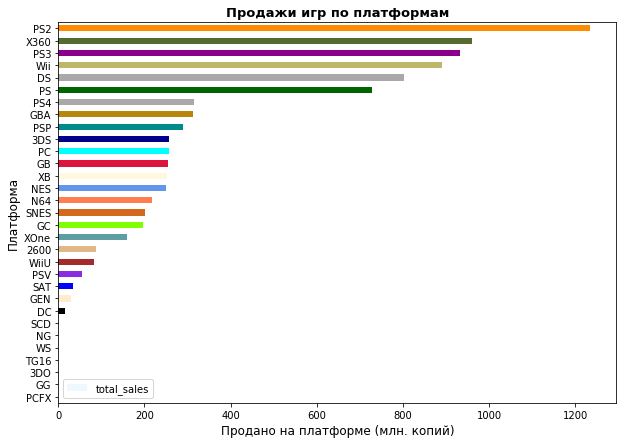

In [28]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True)\
.plot(y='total_sales', kind='barh', color = plt.cm.colors.cnames.keys(), figsize=(10,7))
plt.xlabel('Продано на платформе (млн. копий)', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.title('Продажи игр по платформам', fontsize=13, fontweight='bold')
plt.show()

Ожидаемо больше всего продаж на Playstation 2, ведь она до сих пор является самой популярной консолью в мире, хотя Nintendo DS уже практически сравнялась с ней по количеству проданных консолей, а Nintendo Switch имеет все шансы догнать ее. И, соответственно, чем больше продано консолей, тем больше игр покупают на этой платформе.

На втором месте Xbox 360, от которого никто не ожидал такого успеха в позапрошлом поколении игр, а следом разместились Playstation 3, Nintendo Wii и DS, а также Playstation 1.

Построим по 6 самым популярным платформам распределение по годам.

In [29]:
def hists(platform, title, color):
    df[df['platform'] == platform]\
        .groupby('year_of_release')\
        .agg({'total_sales':'sum'})\
        .plot(kind='bar', figsize=(10,7), grid=True, color = color)
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Продано за год (млн. копий)')
    plt.title(title)

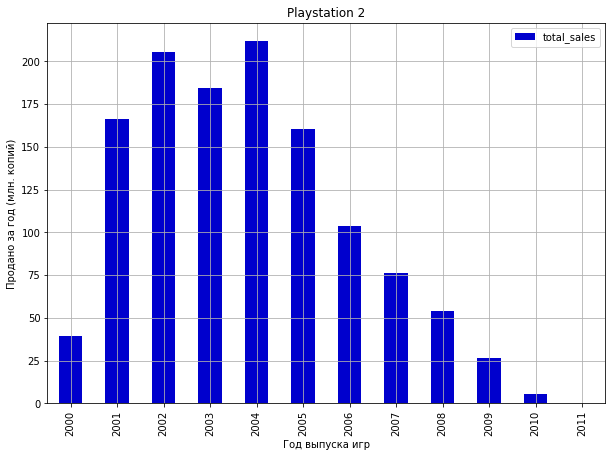

In [30]:
hists ('PS2', 'Playstation 2', 'mediumblue')

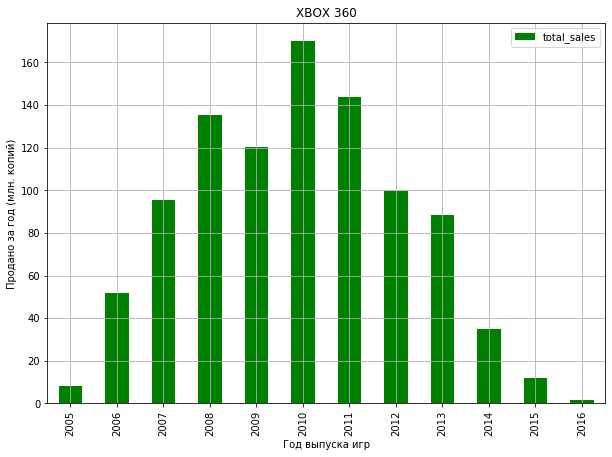

In [31]:
hists ('X360', 'XBOX 360', 'g')

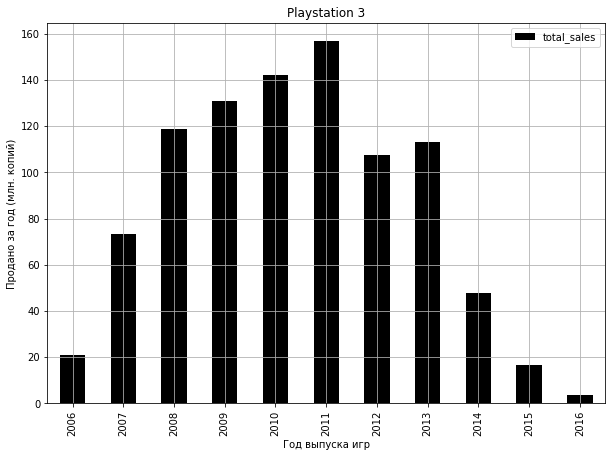

In [32]:
hists ('PS3', 'Playstation 3', 'k')

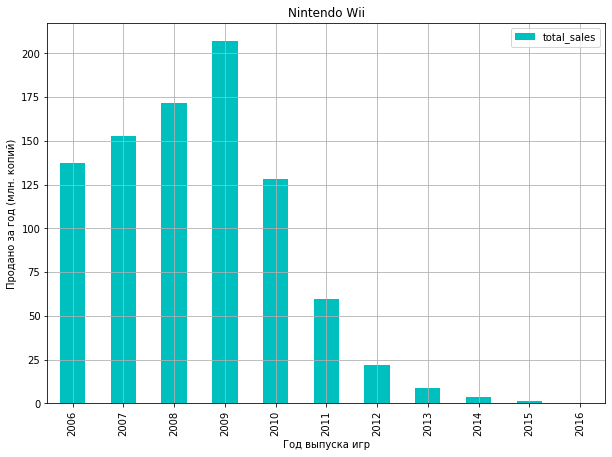

In [33]:
hists ('Wii', 'Nintendo Wii', 'c')

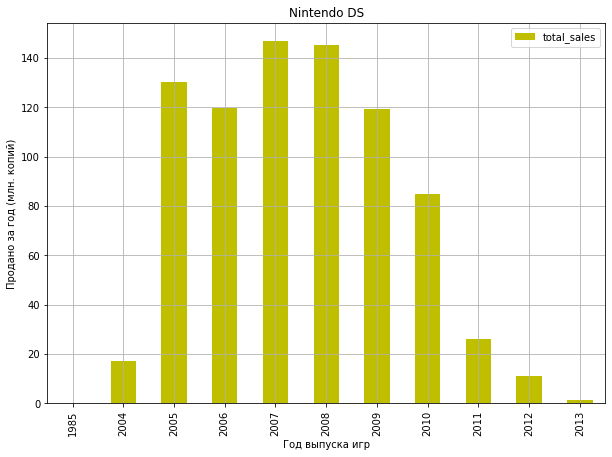

In [34]:
hists ('DS', 'Nintendo DS', 'y')

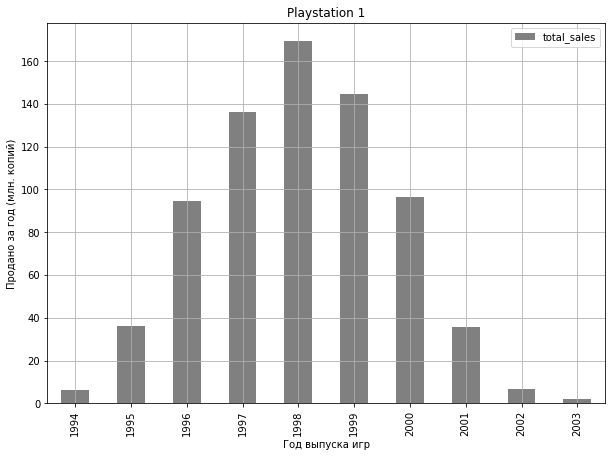

In [35]:
hists ('PS', 'Playstation 1', 'grey')

Как видно из гистограмм, жизненный цикл консолей составляет в среднем до 10 лет, но основные продажи игр составляют всего 7-8 лет, в остальные года осуществляются остаточные продажи для тех, кто по каким-то причинам не приобрел консоль следующего поколения. Пик продаж приходится на третий - шестой года жизненного цикла консолей.

### Определение актуального периода и платформ

Исходя из предыдущих данных можно сделать вывод, что определенные ранее самые популярные консоли для анализа нам не интересны в связи с неактуальностью, потому что их жизненный цикл уже закончен или заканчивается и они нам для прогноза продаж на 2017 г. не подойдут. Нужно определить наиболее актуальные платформы за 2014-2016 г., т.к. в конце 2013 г. появилось восьмое поколение консолей.

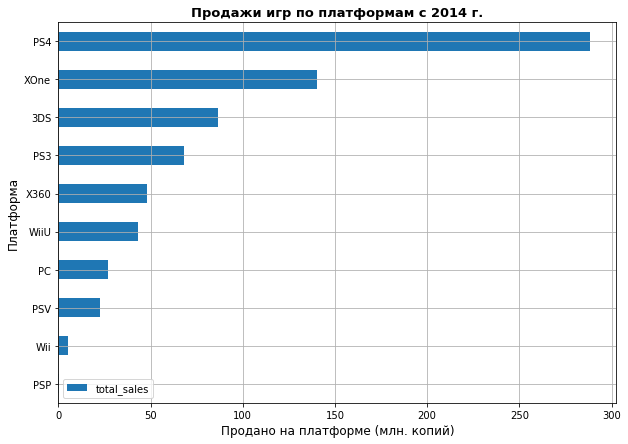

In [36]:
df.query('year_of_release >= 2014')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True)\
.plot(y='total_sales', kind='barh', figsize=(10,7), grid = True)
plt.xlabel('Продано на платформе (млн. копий)', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.title('Продажи игр по платформам c 2014 г.', fontsize=13, fontweight='bold')
plt.show()

Как видим, самые популярные платформы в период с 2014 по 2016 г. составляют PS4, Xbox One, Nintendo 3DS, PS 3, Xbox 360, Nintendo Wii U, PC, PS Vita, Nintendo Wii и PSP. Как мы уже знаем, PS 3, Xbox 360, Nintendo Wii и PSP работают в данный период по принципу остаточных продаж, т.к. пик продаж на них остался далеко позади и при прогнозе на 2017 г. на них ориентироваться не стоит.

Для удобства создадим отдельный датасет с актуальными платформами.

In [37]:
top_df = df.query('year_of_release >= 2014 and platform == ["PS4", "XOne", "WiiU", "3DS", "PC", "PSV"]')

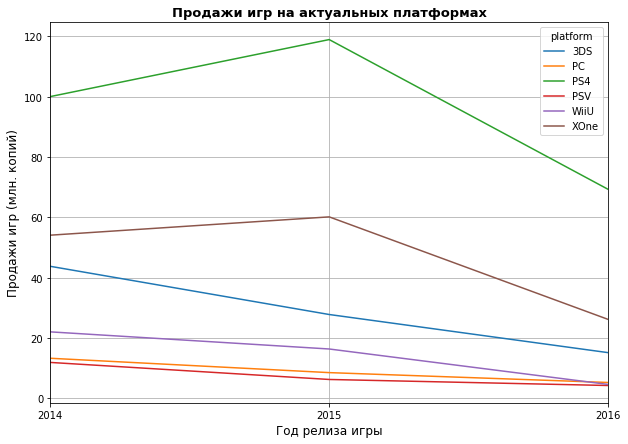

In [38]:
top_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(10,7), grid=True)
plt.xlabel('Год релиза игры', fontsize=12)
plt.ylabel('Продажи игр (млн. копий)', fontsize=12)
plt.title('Продажи игр на актуальных платформах', fontsize=13, fontweight='bold')
plt.xticks(np.arange(2014,2017,1))
plt.show()

Как видно, безоговорочным лидером по количеству проданных копий игр является Playstation 4. Следом почти с двукратным отрывом идет Xbox One. И только две эти платформы показывали рост проданных копий игр с 2014 г., у остальных платформ идет медленный спад количества продаж. Как видим, за 2016 г. по всем платформам уменьшилось количество проданных копий игр в сравнении с предыдущим годом, из чего можно сделать вывод, что данные в датасете представлены не за весь 2016 г., ведь в конце 2015 г. на PS4 вышла коллекция Uncharted, а в мае 2016 г. Uncharted 4, что должно было привести к увеличению проданных игр за 2016 г., а не к его снижению.

### Ящик с усами

Построим "ящик с усами" по нашим актуальным игровым платформам.

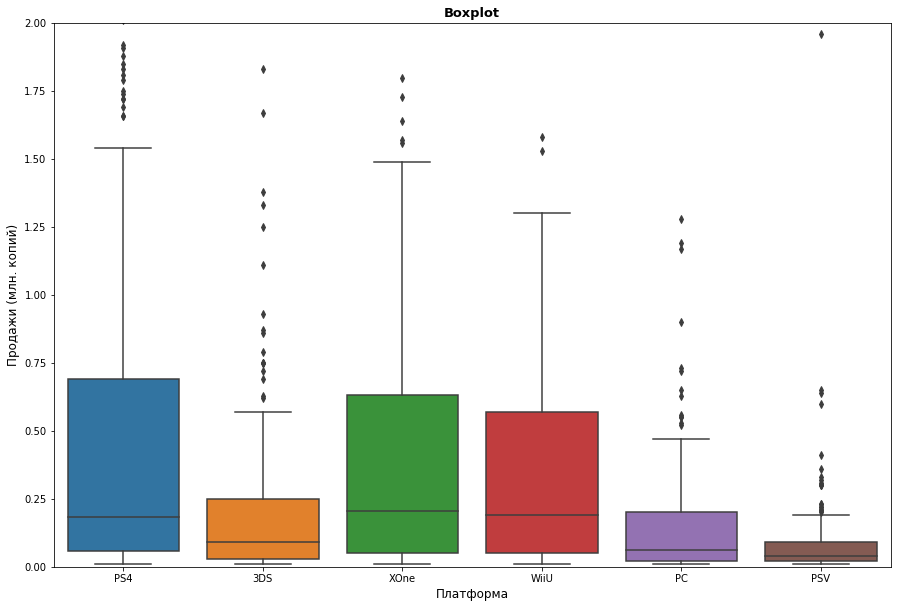

In [39]:
#построим boxplot в SeaBorn, т.к. он выглядит более красиво
plt.figure(figsize=(15,10))
sns.boxplot(data=top_df, x='platform', y='total_sales')
plt.title('Boxplot', fontsize=13, fontweight='bold')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.ylim([0, 2])
plt.show()

Как видим, на PS4 продажи игр выше, чем на остальных платформах, что не удивительно, т.к. PS4 была самой популярной платформой в мире из актуальных платформ того времени.

При этом медиана у Xbox One и Wii U находится чуть выше, потому что там в целом количество продаж ниже (XBOX больше всего популярна только в Северной Америке, а WiiU на азиатском рынке) и, соответственно, медиана будет находиться выше. 

Затем идут 3DS, PC и PS Vita. 3DS и PS Vita являются нишевыми продуктами направленными на портативный гейминг, поэтому в эпоху гейминга на смартфонах они пользуются популярностью в основном в Азии и на международном рынке представлены слабо. РС в данном рейтинге находится на такой низкой позиции, потому что на представленных в датасете рынках он не особо популярен, в отличие от РФ, Восточной Европы, Китая, Индии и многих других стран. Связано это с тем, что на консолях нет региональных цен на игры, в отличие от таковых в том же Steam и поэтому на развивающихся рынках выходит дешевле играть на PC.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Итак, исходя из гистограмм и "ящика с усами" мы пришли к выводу, что самой популярной из актуальных платформ является PlayStation 4. Проверим, как влияют на продажи внутри PS4 отзывы пользователей и критиков.

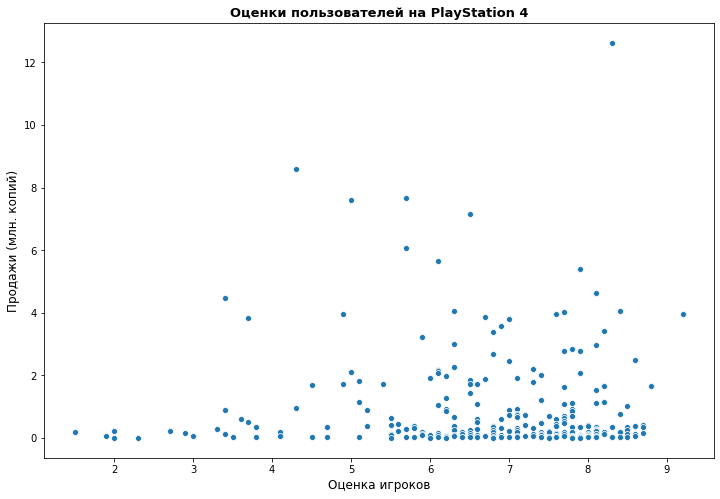

In [40]:
#для начала построим диаграмму рассеяния для оценок пользователей
plt.figure(figsize=(12,8))
sns.scatterplot(x='user_score', y='total_sales', data=df.query('platform == "PS4"'))
plt.title('Оценки пользователей на PlayStation 4', fontsize=13, fontweight='bold')
plt.xlabel('Оценка игроков', fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.show()

Как видим по диаграмме, особой зависимости между оценкой пользователей и количеством проданных копий игр нет.

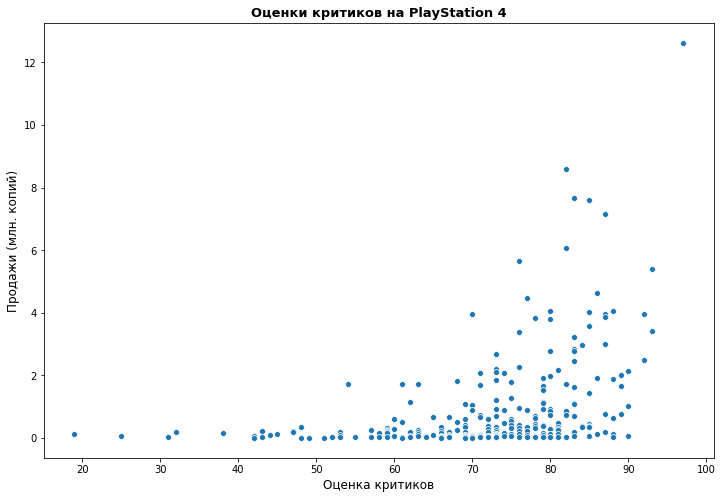

In [41]:
#теперь рассмотрим зависимость между оценкой критиков и продажами игр
#для начала построим диаграмму рассеяния для оценок пользователей
plt.figure(figsize=(12,8))
sns.scatterplot(x='critic_score', y='total_sales', data=df.query('platform == "PS4"'))
plt.title('Оценки критиков на PlayStation 4', fontsize=13, fontweight='bold')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.show()

Здесь уже видная бОльшая взаимосвязь между оценкой критиков и количеством продаж.

Теперь рассмотрим корреляцию между оценками и продажами.

In [42]:
df.query('platform == "PS4"')[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


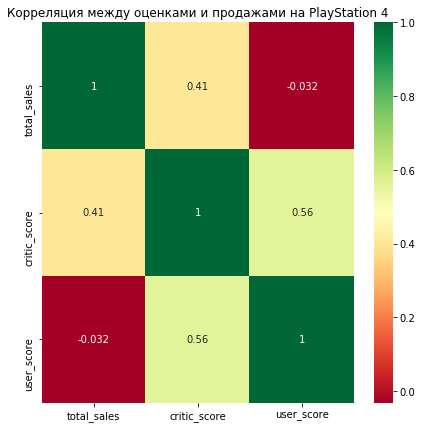

In [43]:
#и визуализируем корреляцию
plt.figure(figsize=(7,7))
sns.heatmap(df.query('platform == "PS4"')
            [['total_sales', 'critic_score','user_score']]
            .corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция между оценками и продажами на PlayStation 4')
plt.show()

Данные из `Heatmap` подтвердили, что между оценками пользователей и количеством проданных копий игр вообще нет связи, а вот оценки критиков оказывают несущественное влияние на продажи игр.

Посмотрим на ситуацию с корреляцией на других актуальных платформах, исключив из данных PlayStation 4.

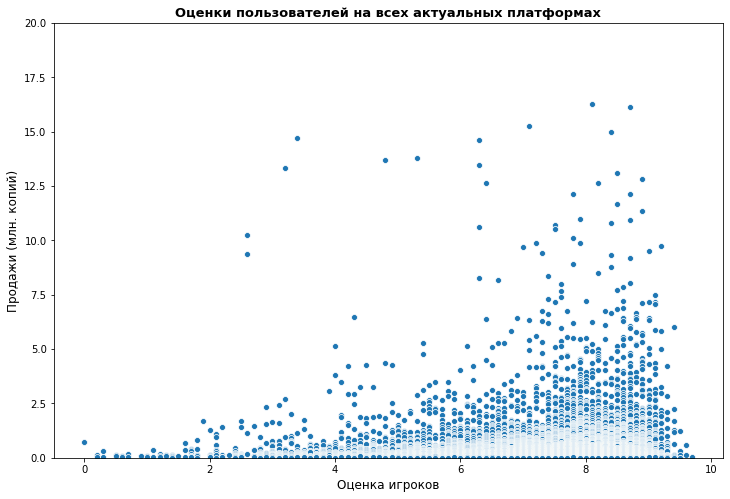

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='user_score', y='total_sales', data=df.query('platform != "PS4"'))
plt.title('Оценки пользователей на всех актуальных платформах', fontsize=13, fontweight='bold')
plt.xlabel('Оценка игроков', fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.ylim([0, 20])
plt.show()

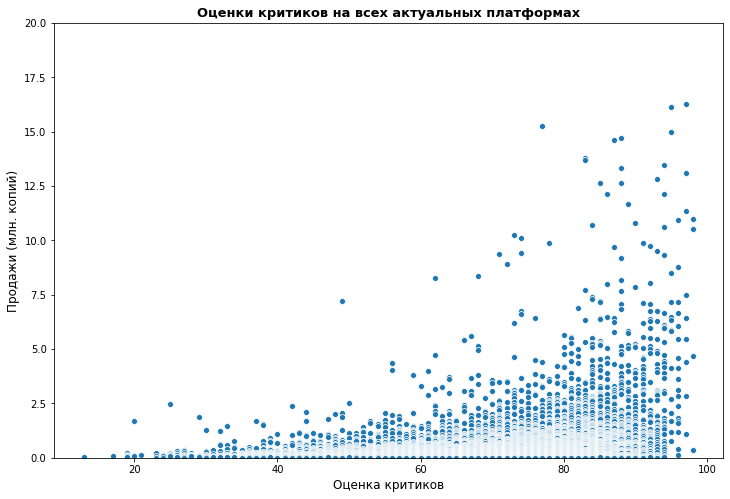

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='critic_score', y='total_sales', data=df.query('platform != "PS4"'))
plt.title('Оценки критиков на всех актуальных платформах', fontsize=13, fontweight='bold')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи (млн. копий)',fontsize=12)
plt.ylim([0, 20])
plt.show()

In [46]:
df.query('platform != "PS4"')[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.240339,0.092717
critic_score,0.240339,1.000000,0.583367
user_score,0.092717,0.583367,1.000000


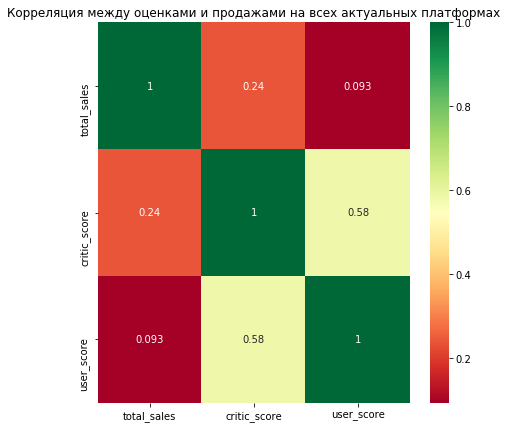

In [47]:
plt.figure(figsize=(7,7))
sns.heatmap(df.query('platform != "PS4"')
            [['total_sales', 'critic_score','user_score']]
            .corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция между оценками и продажами на всех актуальных платформах')
plt.show()

Видно, что по всем актуальная платформам зависимость между оценкой критиков и количеством проданных копий еще ниже, пользовательская оценка также не оказывает никакого влияния на продажи.

### Распределение игр по жанрам

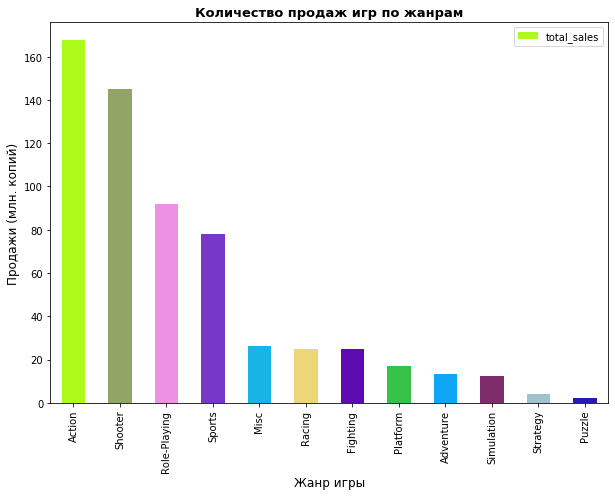

In [48]:
top_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)\
.plot(y='total_sales', kind='bar', color=np.random.rand(12,3), figsize=(10,7))
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Продажи (млн. копий)', fontsize=12)
plt.title('Количество продаж игр по жанрам', fontsize=13, fontweight='bold')
plt.show()

Как и ожидалось, самые популярные жанры на актуальных платформах - шутер, экшен и РПГ. Самые непопулярные жанры - симуляторы, стратегии и игры-паззлы. Это всё объясняется тем, что основные продажи приходятся на консоли, а там как раз симуляторы, стратегии и игры-паззлы не пользуются популярностью, в отличие от PC.

Посмотрим на количество выпускаемых игр по жанрам.

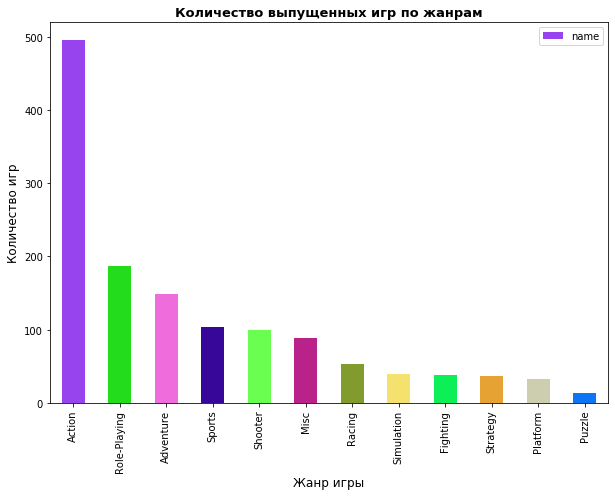

In [49]:
top_df.pivot_table(index='genre', values='name', aggfunc='count')\
.sort_values(by='name', ascending=False)\
.plot(y='name', kind='bar', color=np.random.rand(12,3), figsize=(10,7))
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.title('Количество выпущенных игр по жанрам', fontsize=13, fontweight='bold')
plt.show()

По количеству выпущенных игр безоговорочно лидирует `Action`, потому что под эту категорию подходит большое множество совершенно разнообразных игр. А вот количество выпущенных шутеров в 3 раза меньше, чем экшенов, но при этом по количеству проданных копий они находятся почти на одном уровне.

### Вывод по разделу

1. До 1995 года игры выпускались в небольших количествах. С 1995 года пошел рост количества игровых релизов в год. В 2002 произошел скачок количества игровых релизов практически в 2 раза, что можно связать с набравшей популярность среди игроков и разработчиков игр Playstation 2.
2. Пик количества игровых релизов пришелся на 2008-2009 г. После пика происходит достаточно резкое снижение количества выпущенных игр в 2012 г., что можно связать и с закатом поколения Playstation 3/Xbox 360 и с набирающим популярность сегментом мобильных игр, которые на сегодняшний день по оборотам обходят весь суммарный сегмент PC и консольных игр вместе взятых.
2. Больше всего продано игр было на Playstation 2. На втором месте Xbox 360, а следом разместились Playstation 3, Nintendo Wii и DS, а также Playstation 1.
3. Жизненный цикл консолей составляет в среднем до 10 лет, но основные продажи игр составляют всего 7-8 лет, а пик продаж приходится на третий - шестой года жизненного цикла консолей.
4. Определенные выше самые популярные консоли для анализа нам не интересны в связи с неактуальностью, потому что их жизненный цикл уже заканчивается или закончен и они нам для прогноза продаж на 2017 г. не подойдут.
5. Самые популярные платформы в период с 2014 по 2016 г. составляют `PS4`, `Xbox One`, `Nintendo 3DS`, PS 3, Xbox 360, `Nintendo Wii U`, `PC`, `PS Vita`, Nintendo Wii и PSP. Как мы уже знаем, PS 3, Xbox 360, Nintendo Wii и PSP работают в данный период по принципу остаточных продаж, т.к. пик продаж на них остался далеко позади и при прогнозе на 2017 г. на них ориентироваться не стоит.
6. На PS4 продажи игр выше, чем на остальных платформах, поэтому ее и будем рассматривать как самую популярную актуальную платформу. 
7. Между оценками пользователей и количеством проданных копий игр вообще нет связи, а вот оценки критиков оказывают несущественное влияние на продажи игр.
8. Самые популярные жанры на актуальных платформах - экшен, шутер и РПГ. Самые непопулярные жанры - симуляторы, стратегии и игры-паззлы. При этом самым продаваемым жанром является шутер.

## Портрет пользователя каждого региона

На этом шаге определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы

In [50]:
regions = top_df.pivot_table(index='platform', values=('na_sales', 'eu_sales','jp_sales'), aggfunc='sum')
regions

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
WiiU,13.15,7.31,19.36
XOne,46.25,0.32,81.27


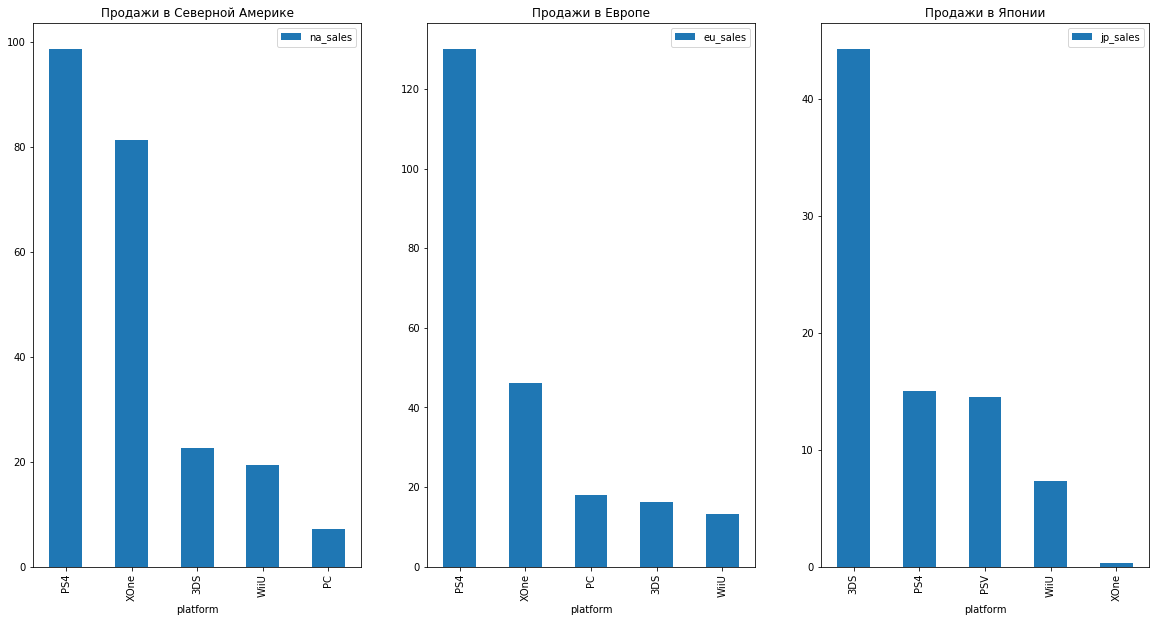

In [51]:
#посмотрим на топ-5 жанров по регионам
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

regions.sort_values(by ='na_sales', ascending=False).head(5)\
.plot(ax=axes[0], y='na_sales', kind='bar', title='Продажи в Северной Америке')

regions.sort_values(by ='eu_sales', ascending=False).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='bar', title='Продажи в Европе')

regions.sort_values(by ='jp_sales', ascending=False).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='bar', title='Продажи в Японии')
plt.show()

Из этих данных мы видим, что рынки Северной Америки и Европы похожи и лидирующее место на этих рынках занимает PlayStation 4, а на втором месте идет Xbox One.

Но если в Америке PS4 опережает XOne всего на 17 %, то в Европе PS4 опережает XOne почти в 3 раза.

Третье место в Европе занимает PC, видимо благодаря Германии и Восточной Европе, потому что в этих странах PC составляет подавляющую роль среди игровых платформ, а вот в Америке РС не пользуется популярностью, потому что там больше играют на консолях.

В Японии сформирован другой рынок, на котором доминируют японские игровые платформы от Sony и Nintendo и преобладает портативный гейминг, поэтому на данный момент в Японии Nintendo Switch больше, чем всех остальных игровых платформ вместе взятых.

### Самые популярные жанры

In [52]:
reg_genre = top_df.pivot_table(index='genre', values=('na_sales', 'eu_sales','jp_sales'), aggfunc='sum')
reg_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,63.49,24.71,60.16
Adventure,4.96,3.18,3.92
Fighting,6.03,5.01,11.23
Misc,8.38,5.17,10.26
Platform,6.35,2.67,6.45
Puzzle,0.52,0.89,0.65
Racing,12.92,1.64,7.72
Role-Playing,25.94,28.70,29.74
Shooter,56.23,4.21,66.29


Рассмотрим топ-5 жанров по регионам.

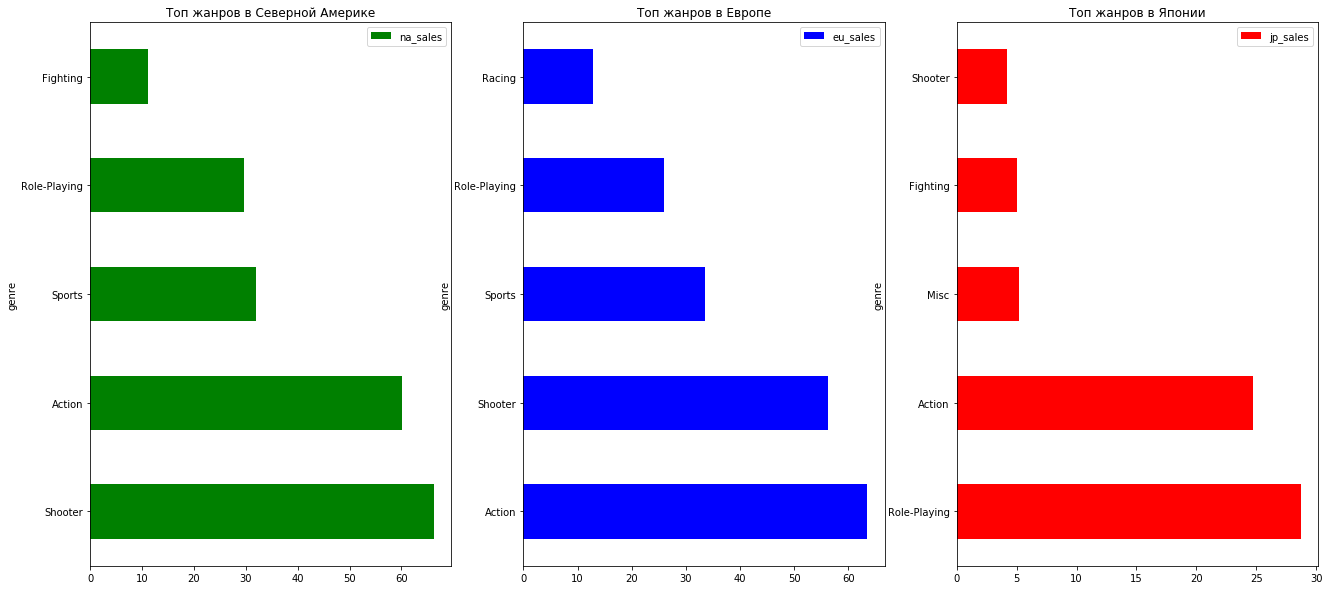

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(22, 10))

reg_genre.sort_values(by ='na_sales', ascending=False).head(5)\
.plot(ax=axes[0], y='na_sales', kind='barh', color='g', title='Топ жанров в Северной Америке')

reg_genre.sort_values(by ='eu_sales', ascending=False).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='barh', color='b', title='Топ жанров в Европе')

reg_genre.sort_values(by ='jp_sales', ascending=False).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='barh', color='r', title='Топ жанров в Японии')
plt.show()

Как видно, в Европе и Северной Америке ситуация снова очень похожа: там лидируют шутеры, экшены, спортивные игры, РПГ и только на 5 месте есть различия - в Америке более популярны файтинги, а в Европе гонки.

Япония снова идет по своему пути и там самым популярным жанром являются РПГ (JRPG и MMORPG), потом идут экшены, misc (игры, которые не подходят под какой-то определенный жанр), файтинги и замыкают пятерку шутеры. 

Плюс в Японии отрыв между вторым местом (экшен) и третьим местом (misc) составляет примерно 5 раз, в то время как в Европе и Северной Америке убывание популярностей жанров идет в более плавном порядке.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
esrb = top_df.pivot_table(index = ['rating'], values = ('na_sales', 'eu_sales','jp_sales'), aggfunc = 'sum')
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,45.90,8.29,37.65
E10+,17.89,4.32,23.53
M,82.38,6.40,82.23
T,30.09,11.99,32.46
no_rating,50.80,50.43,55.76


Напомним, что:
`E` — Everyone - «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.

`E10+` — Everyone 10+ (Первоначально "K-A") - «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

`T` — Teen - «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

`M` — Mature - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

Рассмотрим количество продаж по рейтингу в разных регионах.

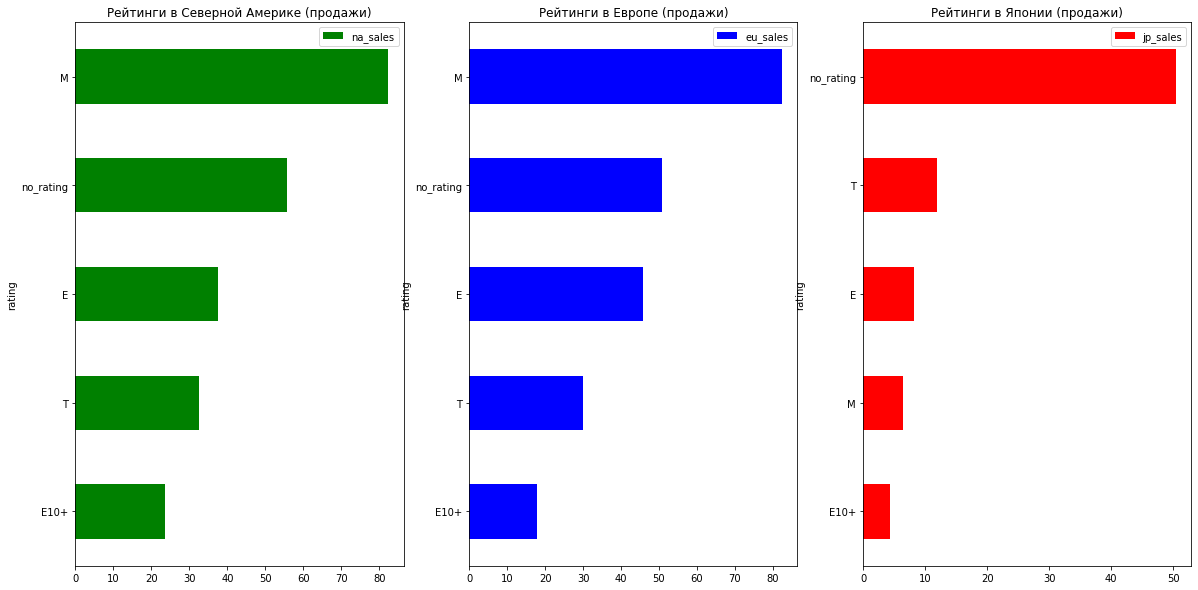

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

esrb.sort_values(by ='na_sales', ascending=True)\
.plot(ax=axes[0], y='na_sales', kind='barh', color='g', title='Рейтинги в Северной Америке (продажи)')

esrb.sort_values(by ='eu_sales', ascending=True).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='barh', color='b', title='Рейтинги в Европе (продажи)')

esrb.sort_values(by ='jp_sales', ascending=True).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='barh', color='r', title='Рейтинги в Японии (продажи)')
plt.show()

И снова видим, что продажи игр в зависимости от рейтинга в Северной Америке и Европе полностью совпадают: на первом месте игры с рейтингом `Mature - «Для взрослых»`, что говорит о взрослой играющей аудитории и любви к шутерам и экшенам (где зачастую используется самый взрослый рейтинг), на втором месте идут игры без рейтинга, что возможно, т.к. компании-разработчики не обязаны предоставлять игру на определение рейтинга до начала официальных продаж и рейтинг может быть присвоен позже, а в выгрузку эти рейтинги потом не добавили. Затем с отставанием почти в 2 раза от игр с рейтингом `M` идут игры с рейтингом `Everyone - «Для всех»`, а далее идут игры для подростков и для детей от 10 лет.

Японский рынок снова отличается и там лидируют игры без рейтинга ESRB, т.к. это северо-американская компания и в Японии ею промаркированы игры, которые выходили в Северной Америке. А т.к. японский рынок самобытен, там есть собственная рейтинговая организация (CERO) и подавляющее большинство составляют японские игры, поэтому там так много игр без присвоенного рейтинга ESRB. Самым популярным рейтингом из игр, оцененных ESRB, в Японии является рейтинг `Teen - «Подросткам»`, что как раз подразумевает популярность менее кровавых и жестоких (по сравнению с шутерами и экшенами) RPG и говорит нам о более молодой играющей аудитории, затем идут игры с рейтингом `Everyone - «Для всех»`, затем игры `Mature - «Для взрослых»` и замыкают список игры для подростков и для детей от 10 лет.

### Вывод по разделу

1. В целом, игровые рынки Европы и Северной Америки очень похожи, там популярны одни и те же домашние платформы, жанры игр и игры с определенным рейтингом ESRB. Среди платформ там лидируют PlayStation 4 и Xbox One, среди жанров экшены и шутеры, а самый популярный рейтинг игр `M — Mature - «Для взрослых»`.
2. В Японии сформирован другой игровой рынок, направленный на портативный гейминг, т.к. там лидирует Nintendo 3DS, а также популярны ролевые игры от внутренних разработчиков (JRPG) и с рейтингом `Teen - «Подросткам»`.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

 Сформулируем нулевую и альтернативную гипотезы. В нулевой гипотезе должен присутствовать знак равенства, следовательно:
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Принимать или отвергать нулевую гипотезу будем по p-value - это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна.

Установим общепринятый уровень <b>p-value, равный 0,05.</b>

Сравним дисперсии рейтингов по выборке. Т.к. мы используем не всю совокупность, а выборку из неё, укажем параметр <b>ddof=1.</b>

In [56]:
xone = top_df.query('platform == "XOne" & user_score != "nan"')['user_score']
pc = top_df.query('platform == "PC" & user_score != "nan"')['user_score']
print('Дисперсия пользовательского рейтинга на Xbox One', np.var(xone, ddof=1))
print('Дисперсия пользовательского рейтинга на PC', np.var(pc, ddof=1))

Дисперсия пользовательского рейтинга на Xbox One 1.8910067
Дисперсия пользовательского рейтинга на PC 2.9011543


Дисперсии отличаются более, чем на 5 %, поэтому параметр <b>equal_var = False.</b>
И т.к. проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам,применим метод <b>scipy.stats.ttest_ind</b>

In [57]:
alpha = 0.05 
results = st.ttest_ind(xone, pc, equal_var= False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.116
Не получилось отвергнуть нулевую гипотезу


Итак, нам не получилось отвергнуть нулевую гипотезу, соответственно пользовательские рейтинги игр на Xbox One и РС примерно сопоставимы.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports разные.

Проделаем все те же действия, что и при проверке первой гипотезы.

In [58]:
action = top_df.query('genre == "Action" & user_score != "nan"')['user_score']
sports = top_df.query('genre == "Sports" & user_score != "nan"')['user_score']
print('Дисперсия пользовательского рейтинга жанра Action', np.var(action, ddof=1))
print('Дисперсия пользовательского рейтинга жанра Sports', np.var(sports, ddof=1))

Дисперсия пользовательского рейтинга жанра Action 1.8450643
Дисперсия пользовательского рейтинга жанра Sports 2.64045


Дисперсии отличаются более, чем на 5 %, поэтому параметр <b>equal_var = False.</b>
И т.к. проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам,применим метод <b>scipy.stats.ttest_ind</b>. Установим общепринятый уровень <b>p-value, равный 0,05.</b>

In [59]:
alpha = 0.05 
results = st.ttest_ind(action, sports, equal_var= False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


P-value получился равен нулю, т.е. вероятность того, что средние пользовательские рейтинги жанров Action и Sports одинаковые очень мала и мы отвергаем нулевую гипотезу.

С уверенностью можно сказать, что средние пользовательские рейтинги жанров Action и Sports разные. Посмотрим на разницу.

In [60]:
print ('Средний пользовательский рейтинг жанра Action:', action.mean())
print ('Средний пользовательский рейтинг жанра Sports:', sports.mean())
print ('Разница составляет:', (1 - (sports.mean()/action.mean())).round(2))

Средний пользовательский рейтинг жанра Action: 6.8281627
Средний пользовательский рейтинг жанра Sports: 5.6360464
Разница составляет: 0.17


У жанра Action средний пользовательский рейтинг выше, чем у жанра Sports, на 17 %.

### Вывод по разделу

Итак, обе наши гипотезы подтвердились и делаем вывод, что:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

1. <b>В датасете 16715 строк и 11 столбцов. Представлены данные за большой период: с 1980 года по 2016 год.</b>
2. <b>При подготовке данных к анализу:</b>
    - Названия столбцов были приведены к нижнему регистру.
    - Были изменены типы данных в столбце year_of_release c float на int, а в столбце user_score с object на float.
    - Данные со значениями tbd в столбце user_score были заменены значениями NaN, т.к. рейтинг у игры не сформирован и взять данные для замены негде.
    - Были удалены две строки с пропусками в столбцах name и genre.
    - Были удалены 269 строк с пропусками в столбце year_of_release, т.к. эти данные заменить нечем.
    - Пропуски в столбцах critic_score, user_score и rating оставили, как есть.
    - В датасет был добавлен столбец с суммарными продажи во всех регионах.
3. <b>Результаты исследовательского анализа данных:</b>
    1. До 1995 года игры выпускались в небольших количествах. С 1995 года пошел рост количества игровых релизов в год. В 2002 произошел скачок количества игровых релизов практически в 2 раза, что можно связать с набравшей популярность среди игроков и разработчиков игр Playstation 2.
    2. Пик количества игровых релизов пришелся на 2008-2009 г. После пика происходит достаточно резкое снижение количества выпущенных игр в 2012 г., что можно связать и с закатом поколения Playstation 3/Xbox 360 и с набирающим популярность сегментом мобильных игр, которые на сегодняшний день по оборотам обходят весь суммарный сегмент PC и консольных игр вместе взятых.
    3. Больше всего продано игр было на Playstation 2. На втором месте Xbox 360, а следом разместились Playstation 3, Nintendo Wii и DS, а также Playstation 1.
    4. Жизненный цикл консолей составляет в среднем до 10 лет, но основные продажи игр составляют всего 7-8 лет, а пик продаж приходится на третий - шестой года жизненного цикла консолей.
    5. Определенные выше самые популярные консоли для анализа нам не интересны в связи с неактуальностью, потому что их жизненный цикл уже заканчивается или закончен и они нам для прогноза продаж на 2017 г. не подойдут.
    6. Самые популярные платформы в период с 2014 по 2016 г. составляют `PS4`, `Xbox One`, `Nintendo 3DS`, PS 3, Xbox 360, `Nintendo Wii U`, `PC`, `PS Vita`, Nintendo Wii и PSP. Как мы уже знаем, PS 3, Xbox 360, Nintendo Wii и PSP работают в данный период по принципу остаточных продаж, т.к. пик продаж на них остался далеко позади и при прогнозе на 2017 г. на них ориентироваться не стоит.
    7. На PS4 продажи игр выше, чем на остальных платформах, поэтому ее и будем рассматривать как самую популярную актуальную платформу.
    8. Между оценками пользователей и количеством проданных копий игр вообще нет связи, а вот оценки критиков оказывают несущественное влияние на продажи игр.
    9. Самые популярные жанры на актуальных платформах - экшен, шутер и РПГ. Самые непопулярные жанры - симуляторы, стратегии и игры-паззлы. При этом самым продаваемым жанром является шутер.
4. <b>Составлен портрет пользователя каждого региона:</b>
    - В целом, игровые рынки Европы и Северной Америки очень похожи, там популярны одни и те же домашние платформы, жанры игр и игры с определенным рейтингом ESRB. Среди платформ там лидируют PlayStation 4 и Xbox One, среди жанров экшены и шутеры, а самый популярный рейтинг игр `M — Mature - «Для взрослых»`.
    - В Японии сформирован другой игровой рынок, направленный на портативный гейминг, т.к. там лидирует Nintendo 3DS, а также популярны ролевые игры от внутренних разработчиков (JRPG) и игры с рейтингом `Teen - «Подросткам»`.
5. <b>При проверке гипотез, они обе подтвердились, из чего мы делаем вывод, что:</b>
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.